In [0]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import sklearn 

In [0]:
df = pd.read_csv('/content/drive/My Drive/data_python.csv')


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
df.drop('Loan_ID',axis = 1,inplace = True)

In [0]:
df['Total_in'] = df['ApplicantIncome'] +df['CoapplicantIncome']

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_in
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,7024.705081
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,6458.663872
min,150.000000,0.000000,9.000000,12.00000,0.000000,1442.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,5416.500000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,81000.000000


In [7]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_in              0
dtype: int64

In [8]:

print(df['Gender'].value_counts(normalize = True))
print(df['Married'].value_counts(normalize = True))
print(df['Dependents'].value_counts(normalize = True))
print(df['Self_Employed'].value_counts(normalize = True))
print(df['Education'].value_counts(normalize = True))
print(df['Property_Area'].value_counts(normalize = True))

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64
Yes    0.651391
No     0.348609
Name: Married, dtype: float64
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64


In [9]:
for i in range(len(df['Dependents'])):
    if df['Dependents'][i] == '3+':
        df['Dependents'][i] = 3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
df['Gender'] = df['Gender'].fillna('Male')
df['Married'] = df['Married'].fillna('Yes')
df['Dependents'] = df['Dependents'].fillna('0')
df['Self_Employed'] = df['Self_Employed'].fillna('No')
df['LoanAmount'].fillna(146.41,inplace=True)
df['Loan_Amount_Term'].fillna(342,inplace=True)
df['Credit_History'].fillna(1,inplace=True)

In [0]:
def encode(a):
    from sklearn.preprocessing import LabelEncoder
    lr = LabelEncoder()
    lr.fit(a)
    a = lr.transform(a)
    return a

In [0]:
df['Gender'] = encode(df['Gender'])
df['Married'] = encode(df['Married'])
df['Education'] = encode(df['Education'])
df['Self_Employed'] = encode(df['Self_Employed'])
df['Property_Area'] = encode(df['Property_Area'])
df['Loan_Status'] = encode(df['Loan_Status'])

In [0]:
df['Dependents'] = df['Dependents'].astype(int)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

In [0]:
df2 = pd.DataFrame(data = scaled,columns = df.columns)

In [16]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_in
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198857,0.74359,1.0,1.0,1.0,0.055394
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0,0.058435
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0,0.019583
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0,0.043980
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0,0.057292


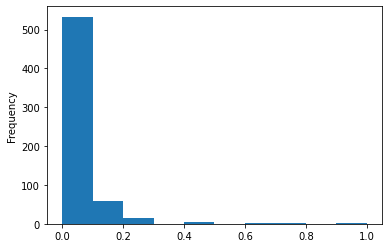

In [19]:
df2['ApplicantIncome'].plot.hist()

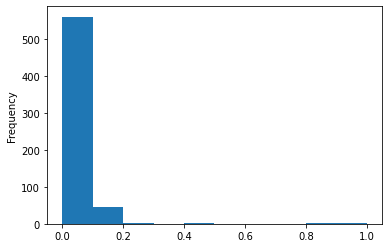

In [23]:
df2['CoapplicantIncome'].plot.hist()

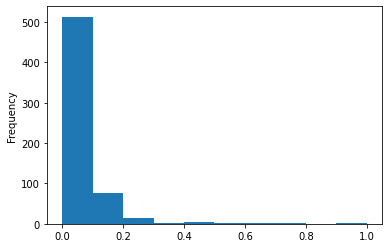

In [24]:
df2['Total_in'].plot.hist()

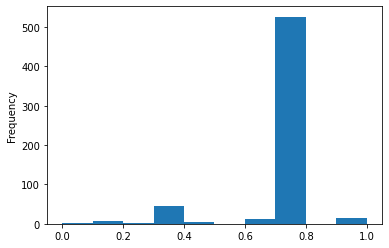

In [25]:
df2['Loan_Amount_Term'].plot.hist()

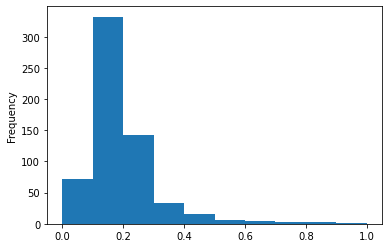

In [26]:
df2['LoanAmount'].plot.hist()

In [0]:
import numpy as np
df2['ApplicantIncome'] = np.cbrt(df2['ApplicantIncome'])
df2['CoapplicantIncome'] = np.cbrt(df2['CoapplicantIncome'])
df2['Total_in'] = np.cbrt(df2['Total_in'])
df2['Loan_Amount_Term'] = np.square(df2['Loan_Amount_Term'])
df2['LoanAmount'] = np.sqrt(df2['LoanAmount'])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0bba2c6ef0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0bba2c6ef0>)

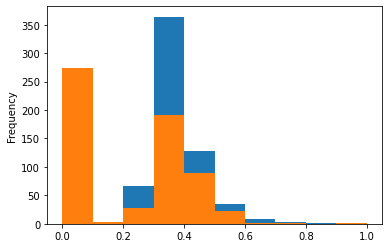

In [30]:
df2['ApplicantIncome'].plot.hist(),df2['CoapplicantIncome'].plot.hist()

In [0]:

df2['Loan_Status'] = df2['Loan_Status'].astype(int)
feature= df2.drop('Loan_Status',axis =1)
label = df2['Loan_Status']

In [0]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(feature,label,test_size = 0.25,random_state = 100,shuffle=True,stratify = label)

In [39]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
lo = LogisticRegression()
lo.fit(train_x,train_y)
clf = RandomForestClassifier(criterion='entropy',n_estimators=100,max_depth = 7)
clf.fit(train_x,train_y)

print('score through random Forest')
from sklearn.metrics import f1_score
print(f1_score(clf.predict(test_x),test_y),f1_score(clf.predict(train_x),train_y))


print('score through Logistic Regression')
from sklearn.metrics import f1_score
f1_score(lo.predict(test_x),test_y),f1_score(lo.predict(train_x),train_y)




score through random Forest
0.8786610878661087 0.9025787965616046
score through Logistic Regression


(0.875, 0.876944837340877)